# Word Cloud

For this project, we'll create a "word cloud" from a text by writing a script.  This script needs to process the text, remove punctuation, ignore case and words that do not contain all alphabets, count the frequencies, and ignore uninteresting or irrelevant words.  A dictionary is the output of the `calculate_frequencies` function.  The `wordcloud` module will then generate the image from your dictionary.

For the input text of your script, you will need to provide a file that contains text only. 
<br><br>
Now you will need to upload your input file here so that your script will be able to process it.  To do the upload, you will need an uploader widget.  Run the following cell to perform all the installs and imports for your word cloud script and uploader widget.  It may take a minute for all of this to run and there will be a lot of output messages. But, be patient. Once you get the following final line of output, the code is done executing. Then you can continue on with the rest of the instructions for this notebook.
<br><br>
**Enabling notebook extension fileupload/extension...**
<br>
**- Validating: <font color =green>OK</font>**

In [1]:
# Here are all the installs and imports you will need for your word cloud script and uploader widget

!pip install wordcloud
!pip install fileupload
!pip install ipywidgets
!jupyter nbextension install --py --user fileupload
!jupyter nbextension enable --py fileupload

import wordcloud
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
import fileupload
import io
import sys

    100% |████████████████████████████████| 368kB 24.9MB/s ta 0:00:01


Installing /opt/conda/lib/python3.6/site-packages/fileupload/static -> fileupload
Making directory: /home/jovyan/.local/share/jupyter/nbextensions/fileupload/
Copying: /opt/conda/lib/python3.6/site-packages/fileupload/static/extension.js -> /home/jovyan/.local/share/jupyter/nbextensions/fileupload/extension.js
Copying: /opt/conda/lib/python3.6/site-packages/fileupload/static/widget.js -> /home/jovyan/.local/share/jupyter/nbextensions/fileupload/widget.js
Making directory: /home/jovyan/.local/share/jupyter/nbextensions/fileupload/fileupload
Copying: /opt/conda/lib/python3.6/site-packages/fileupload/static/fileupload/widget.js -> /home/jovyan/.local/share/jupyter/nbextensions/fileupload/fileupload/widget.js
- Validating: OK

    To initialize this nbextension in the browser every time the notebook (or other app) loads:
    
          jupyter nbextension enable fileupload --user --py
    
Enabling notebook extension fileupload/extension...
      - Validating: OK


<br>
To upload your text file, we'll run the following cell that contains all the code for a custom uploader widget. Once we run this cell, a "Browse" button should appear below it. From that Browse Button, we'll be able to search for the text file from which we'll be creating the wordcloud.

In [9]:
# This is the uploader widget

def _upload():

    _upload_widget = fileupload.FileUploadWidget()

    def _cb(change):
        global file_contents
        decoded = io.StringIO(change['owner'].data.decode('utf-8'))
        filename = change['owner'].filename
        print('Uploaded `{}` ({:.2f} kB)'.format(
            filename, len(decoded.read()) / 2 **10))
        file_contents = decoded.getvalue()

    _upload_widget.observe(_cb, names='data')
    display(_upload_widget)

_upload()

FileUploadWidget(label='Browse', _dom_classes=('widget_item', 'btn-group'))

Uploaded `lyrics.txt` (3.69 kB)


The uploader widget saved the contents of your uploaded file into a string object named *file_contents* that your word cloud script can process. 

From the text file, we'll be eliminating the words which occur quite frequently but have no such imortance for the wordcloud. Also, we'll be taking out the punctuation marks from the text because the punctuation marks make a lot of difference. 
(For eg, "word." and "word," will be considered as two different words and we neither want the punctuation marks in our wodcloud.)

Here, in this case, I've uploaded a text file "lyrics.txt" which had the lyrics from some of the songs from Linkin Park. (I already had this file saved and Yea, Linkin Park is awesome ! XD )

In [14]:
def calculate_frequencies(file_contents):
    # Here is a list of punctuations and uninteresting words you can use to process your text
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    uninteresting_words = ["the", "a", "to", "if", "is", "it", "of", "and", "or", "an", "as", "i", "me", "my", \
    "we", "our", "ours", "you", "your", "yours", "he", "she", "him", "his", "her", "hers", "its", "they", "them", \
    "their", "what", "which", "who", "whom", "this", "that", "am", "are", "was", "were", "be", "been", "being", \
    "have", "has", "had", "do", "does", "did", "but", "at", "by", "with", "from", "here", "when", "where", "how", \
    "all", "any", "both", "each", "few", "more", "some", "such", "no", "nor", "too", "very", "can", "will", "just"]
    
    # LEARNER CODE START HERE
    
    frequencies={}
    file_contents=file_contents.split()
    str1=""
    
    for word in file_contents:
        str1=''.join(ch for ch in word if ch.isalpha())
        if str1.lower() not in uninteresting_words:
            if str1.lower() not in frequencies:
                frequencies[str1.lower()]=1
            else:
                frequencies[str1.lower()]+=1
                    
                    
    
    
    
    #wordcloud
    cloud = wordcloud.WordCloud()
    cloud.generate_from_frequencies(frequencies)
    return cloud.to_array()

Now, we'll be displaying the wordcloud image below.

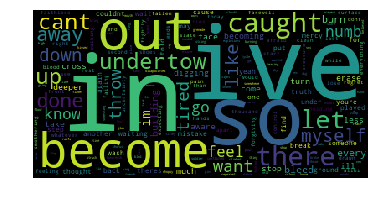

In [15]:
# Display your wordcloud image

myimage = calculate_frequencies(file_contents)
plt.imshow(myimage, interpolation = 'nearest')
plt.axis('off')
plt.show()